In [25]:
# ======================================================================== #
#     Project: Data Science Industry Project
#     Chapter: Banking Marketing Campaign Analysis 
#
#    Author: Dr. Saad Laouadi
#
# =======================================================================
#          Copyright © Dr. Saad Laouadi 2025
# =======================================================================

# Campaign Analysis - Banking Marketing

This notebook focuses on analyzing the marketing campaign performance, including timing analysis, contact strategy evaluation, and generating data-driven recommendations.

## Contents
1. Data Loading and Preparation
2. Campaign Success Analysis
3. Contact Strategy Evaluation
4. Campaign Timing Analysis
5. Recommendations Generation
6. Customer Response Analysis
7. Economic Indicators Impact
8. Campaign Efficiency Metrics
9. Final Campaign Performance Summary

In [1]:
import sys

sys.path.append(os.path.abspath(".."))  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.banking_utils import DataLoader, CampaignAnalysis, CustomerSegmentation

%load_ext autoreload
%autoreload 2

## 1. Data Loading and Preparation

In [2]:
# download the dataset
df = DataLoader.load_banking_data(
    data_path='../data/banking/bank-additional',           # Store data in a data directory one level up from notebooks
    file_name='bank-additional-full.csv',                   # Use the full dataset
    force_download=False                                    # Only download if file doesn't exist
)

# Display basic information about the dataset
print("\nDataset Overview:")
print(df.info())
print("\nFirst few rows:")
print(df.head())


Successfully loaded bank-additional-full.csv
Dataset shape: 41188 rows × 21 columns

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    4

In [3]:
# Initialize analysis classes
campaign_analysis = CampaignAnalysis(df)
customer_segmentation = CustomerSegmentation(df)

## 2. Campaign Success Analysis

In [4]:
# Analyze success rates by different groups
age_analysis = campaign_analysis.analyze_success_by_group('age_group')
print("Campaign Success by Age Group:")
print(age_analysis)

Campaign Success by Age Group:
           Total_Customers  Successful_Conversions  Success_Rate_%
age_group                                                         
60+                    910                     414           45.49
<20                    140                      57           40.71
20-30                 7243                    1067           14.73
50-60                 6270                     668           10.65
30-40                16385                    1597            9.75
40-50                10240                     837            8.17


In [5]:
job_analysis = campaign_analysis.analyze_success_by_group('job')
print("\nCampaign Success by Job:")
print(job_analysis)


Campaign Success by Job:
               Total_Customers  Successful_Conversions  Success_Rate_%
job                                                                   
student                    875                     275           31.43
retired                   1720                     434           25.23
unemployed                1014                     144           14.20
admin.                   10422                    1352           12.97
management                2924                     328           11.22
unknown                    330                      37           11.21
technician                6743                     730           10.83
self-employed             1421                     149           10.49
housemaid                 1060                     106           10.00
entrepreneur              1456                     124            8.52
services                  3969                     323            8.14
blue-collar               9254                     

## 3. Contact Strategy Evaluation

In [6]:
# Analyze contact strategy effectiveness
contact_analysis, prev_outcome_analysis = campaign_analysis.analyze_contact_strategy()

print("Success Rate by Contact Frequency:")
print(contact_analysis)
print("\nSuccess Rate by Previous Outcome:")
print(prev_outcome_analysis)

Success Rate by Contact Frequency:
               success_rate  total_contacts
contact_group                              
1-2 contacts          12.45           28212
3-5 contacts           9.83            9591
5+ contacts            5.49            3385

Success Rate by Previous Outcome:
             success_rate  total_contacts
poutcome                                 
failure             14.23            4252
nonexistent          8.83           35563
success             65.11            1373


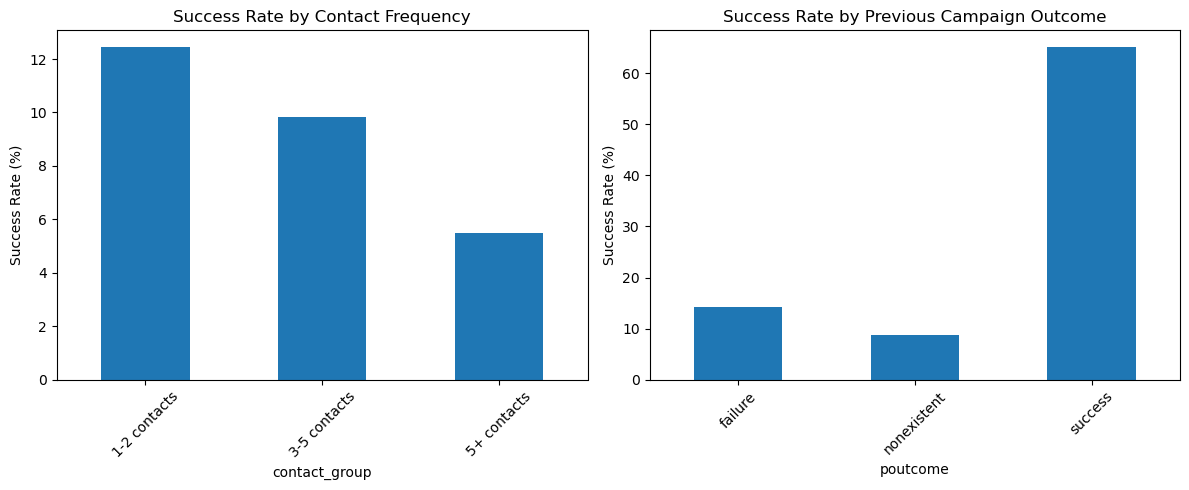

In [23]:
# Visualize contact strategy results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
contact_analysis['success_rate'].plot(kind='bar')
plt.title('Success Rate by Contact Frequency')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
prev_outcome_analysis['success_rate'].plot(kind='bar')
plt.title('Success Rate by Previous Campaign Outcome')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 4. Campaign Timing Analysis

Campaign Success Rates by Month:
month_num
3     50.55
4     20.48
5      6.43
6     10.51
7      9.05
8     10.60
9     44.91
10    43.87
11    10.14
12    48.90
Name: y, dtype: float64

Campaign Success Rates by Day of Week:
day_of_week
fri    10.81
mon     9.95
thu    12.12
tue    11.78
wed    11.67
Name: y, dtype: float64


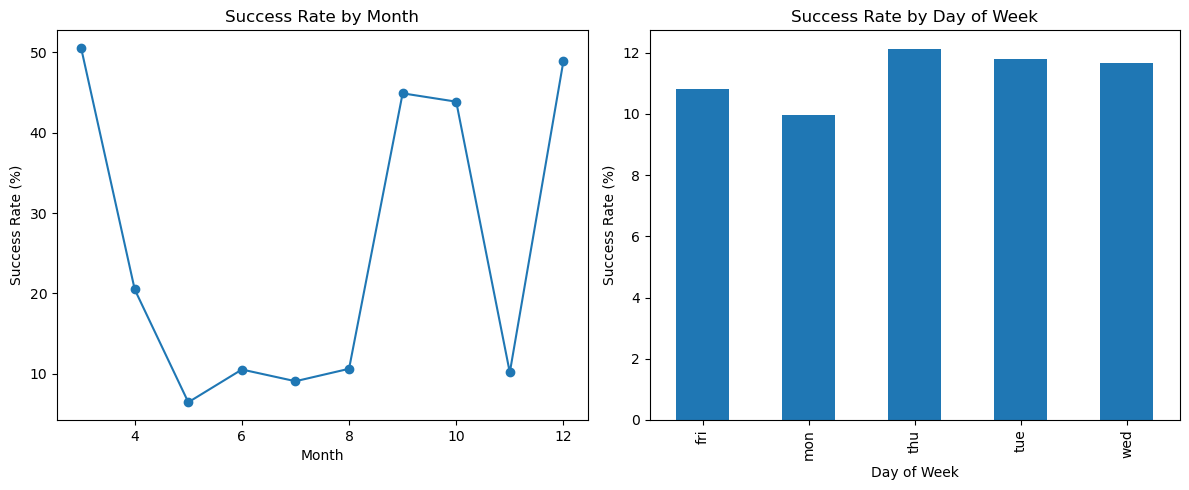

In [8]:
# Analyze campaign timing
month_rates, day_rates = campaign_analysis.analyze_campaign_timing()

print("Campaign Success Rates by Month:")
print(month_rates)
print("\nCampaign Success Rates by Day of Week:")
print(day_rates)

# Visualize timing analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
month_rates.plot(kind='line', marker='o')
plt.title('Success Rate by Month')
plt.xlabel('Month')
plt.ylabel('Success Rate (%)')

plt.subplot(1, 2, 2)
day_rates.plot(kind='bar')
plt.title('Success Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Success Rate (%)')

plt.tight_layout()
plt.show()

## 5. Recommendations Generation

In [10]:
# Generate customer profiles for recommendations
customer_profiles = customer_segmentation.create_customer_profiles()

# Generate campaign recommendations
recommendations = campaign_analysis.generate_recommendations(customer_profiles)

print("Key Campaign Recommendations:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

Key Campaign Recommendations:
1. Focus on 60+ age group which shows highest success rate of 45.49%
2. Prioritize campaigns in month 3 and on thu with success rates of 50.55% and 12.12% respectively
3. Optimal contact frequency is 1-2 contacts with success rate of 12.45%
4. Focus on Retirees segment with success rate of 46.17%


In [11]:
# Save recommendations to file
with open('../reports/campaign_recommendations.txt', 'w') as f:
    f.write("Banking Marketing Campaign Recommendations\n")
    f.write("====================================\n\n")
    for i, rec in enumerate(recommendations, 1):
        f.write(f"{i}. {rec}\n")

## 6. Customer Response Analysis

Response Rate by Education Level:
                     Total_Customers  Successful_Conversions  Success_Rate_%
education                                                                   
illiterate                        18                       4           22.22
unknown                         1731                     251           14.50
university.degree              12168                    1670           13.72
professional.course             5243                     595           11.35
high.school                     9515                    1031           10.84
basic.4y                        4176                     428           10.25
basic.6y                        2292                     188            8.20
basic.9y                        6045                     473            7.82

Response Rate by Marital Status:
          Total_Customers  Successful_Conversions  Success_Rate_%
marital                                                          
unknown                80     

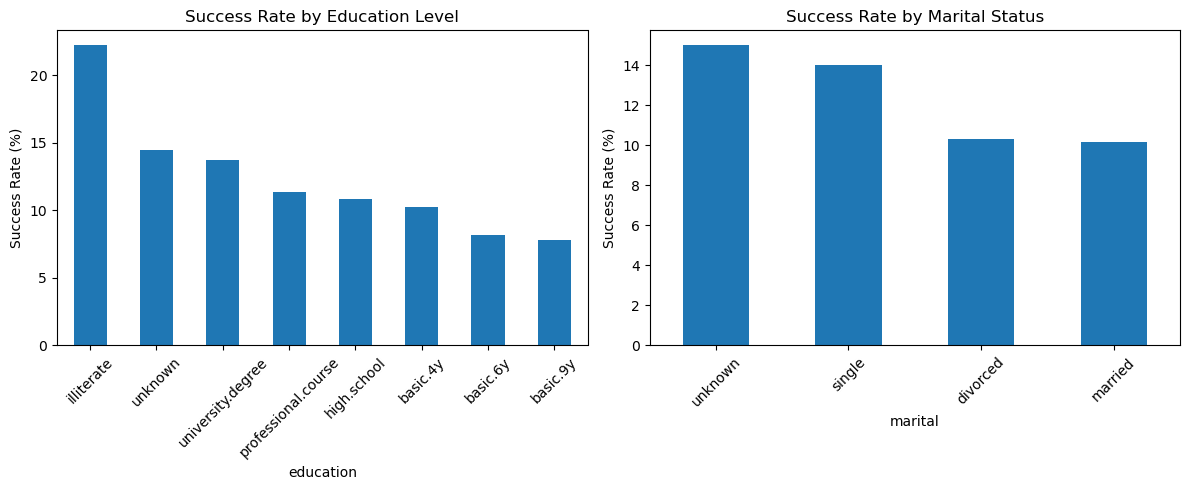

In [12]:
# Analyze customer response patterns
response_by_education = campaign_analysis.analyze_success_by_group('education')
response_by_marital = campaign_analysis.analyze_success_by_group('marital')

print("Response Rate by Education Level:")
print(response_by_education)
print("\nResponse Rate by Marital Status:")
print(response_by_marital)

# Visualize response patterns
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
response_by_education['Success_Rate_%'].plot(kind='bar')
plt.title('Success Rate by Education Level')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
response_by_marital['Success_Rate_%'].plot(kind='bar')
plt.title('Success Rate by Marital Status')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 7. Economic Indicators Impact

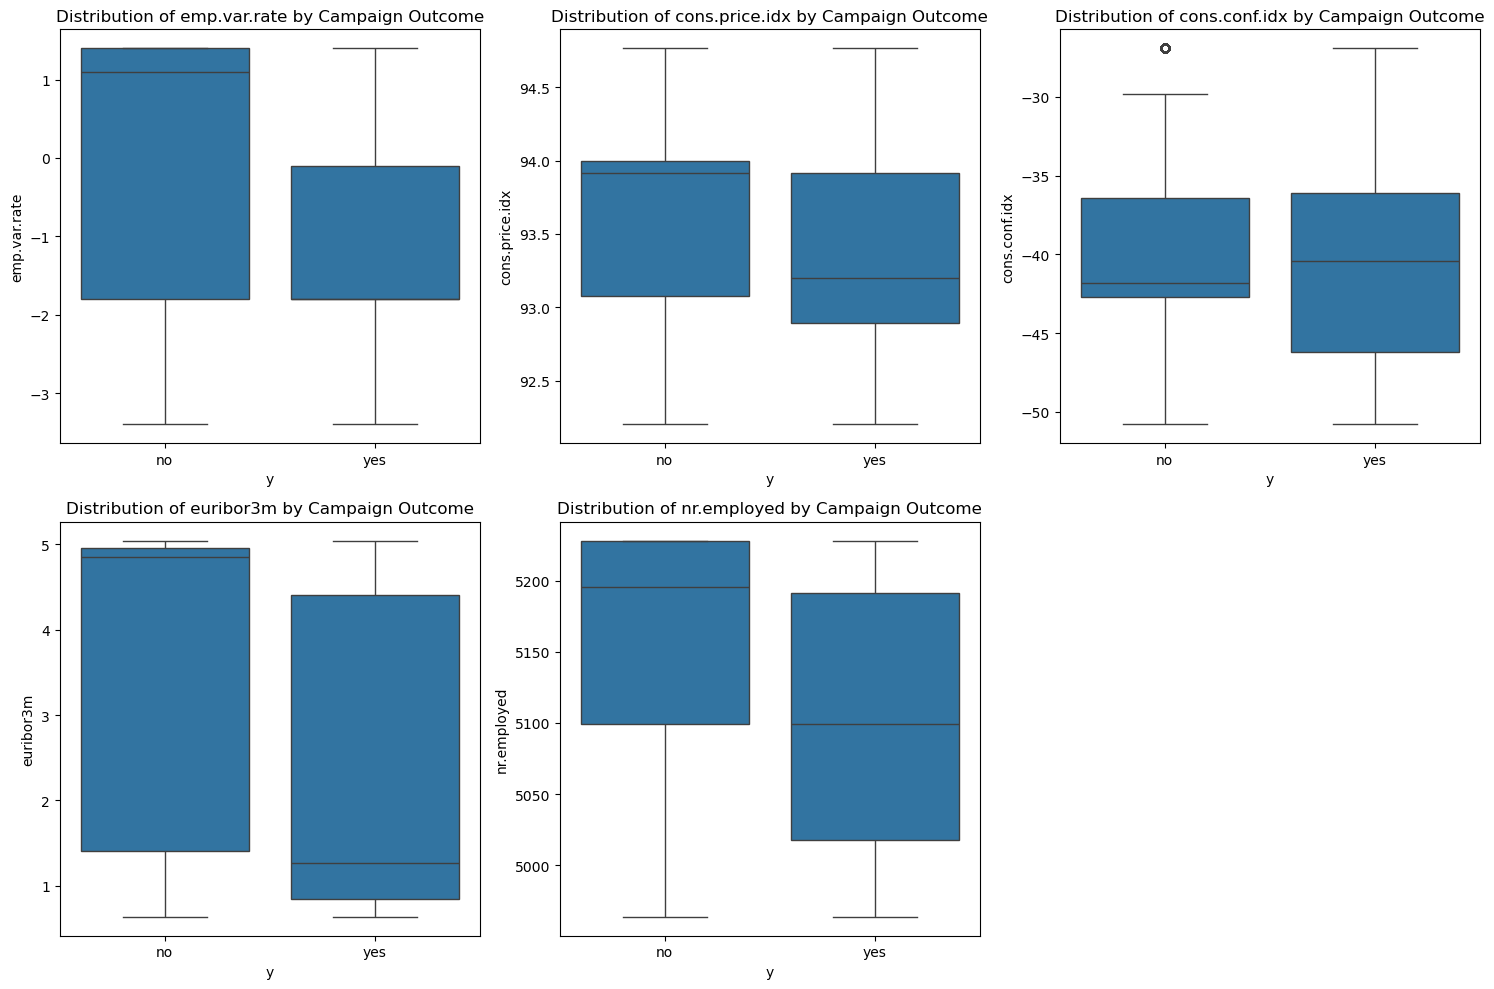


Correlation with Campaign Success:
cons.conf.idx     0.054878
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
nr.employed      -0.354678
dtype: float64


In [13]:
# Analyze impact of economic indicators
economic_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(economic_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='y', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Campaign Outcome')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Calculate correlation with success
success_numeric = pd.get_dummies(df['y'])['yes']
correlations = df[economic_features].corrwith(success_numeric)

print("\nCorrelation with Campaign Success:")
print(correlations.sort_values(ascending=False))

## 8. Campaign Efficiency Metrics

In [20]:
# Calculate campaign efficiency metrics
def calculate_efficiency_metrics(data):
    metrics = {
        'total_contacts': len(data),
        'successful_contacts': (data['y'] == 'yes').sum(),
        'success_rate': ((data['y'] == 'yes').mean() * 100).round(2),
        'avg_calls_per_success': data.loc[data['y'] == 'yes', 'campaign'].mean().round(2),
        'contact_utilization': (data['duration'].sum() / (data['duration'].sum() + data['campaign'] * 60)).round(3)
    }
    return pd.Series(metrics)

# Calculate metrics by month
monthly_efficiency = df.groupby('month', observed = True).apply(calculate_efficiency_metrics,
                                                                include_groups=False)
print("Monthly Campaign Efficiency Metrics:")
print(monthly_efficiency)

Monthly Campaign Efficiency Metrics:
       total_contacts  successful_contacts  success_rate  \
month                                                      
apr              2632                  539         20.48   
aug              6178                  655         10.60   
dec               182                   89         48.90   
jul              7174                  649          9.05   
jun              5318                  559         10.51   
mar               546                  276         50.55   
may             13769                  886          6.43   
nov              4101                  416         10.14   
oct               718                  315         43.87   
sep               570                  256         44.91   

       avg_calls_per_success  \
month                          
apr                     1.77   
aug                     2.23   
dec                     2.03   
jul                     2.61   
jun                     2.21   
mar               

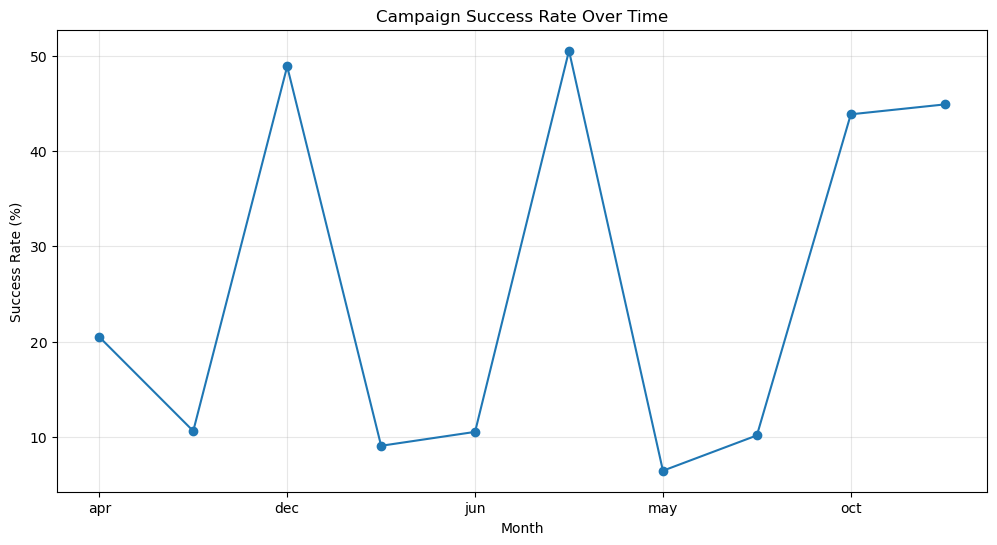

In [19]:
# Visualize efficiency trends
plt.figure(figsize=(12, 6))
monthly_efficiency['success_rate'].plot(kind='line', marker='o')
plt.title('Campaign Success Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Success Rate (%)')
plt.grid(True, alpha=0.3)
plt.show()

## 9. Final Campaign Performance Summary

In [22]:
# Generate comprehensive campaign summary
summary = {
    'Overall Performance': {
        'Total Contacts': len(df),
        'Successful Conversions': (df['y'] == 'yes').sum(),
        'Overall Success Rate': ((df['y'] == 'yes').mean() * 100).round(2),
        'Total Campaign Duration': f"{df['duration'].sum() / 3600:.1f} hours"
    },
    'Best Performing Segments': {
        'Age Group': age_analysis.index[0],
        'Job Category': job_analysis.index[0],
        'Contact Strategy': contact_analysis.index[0],
        'Month': month_rates.idxmax()
    },
    'Economic Impact': {
        'Most Influential Indicator': correlations.index[0],
        'Correlation Strength': np.round(correlations.max(), 3)
    }
}

# Print summary
print("Campaign Performance Summary:")
print("==========================")
for category, metrics in summary.items():
    print(f"\n{category}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

# Save summary to file
with open('../reports/campaign_performance_summary.txt', 'w') as f:
    f.write("Banking Marketing Campaign Performance Summary\n")
    f.write("=========================================\n\n")
    for category, metrics in summary.items():
        f.write(f"\n{category}:\n")
        for metric, value in metrics.items():
            f.write(f"  {metric}: {value}\n")

Campaign Performance Summary:

Overall Performance:
  Total Contacts: 41188
  Successful Conversions: 4640
  Overall Success Rate: 11.27
  Total Campaign Duration: 2955.1 hours

Best Performing Segments:
  Age Group: 60+
  Job Category: student
  Contact Strategy: 1-2 contacts
  Month: 3

Economic Impact:
  Most Influential Indicator: emp.var.rate
  Correlation Strength: 0.055
